In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [11]:
dataset = pd.read_csv('Social_Network_Ads.xls')

In [12]:
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [13]:
X = dataset[['Age', 'EstimatedSalary']]  

In [14]:
y = dataset['Purchased']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
TN, FP, FN, TP = cm.ravel()

In [21]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [22]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[65  3]
 [ 8 24]]


In [23]:
print(f"\nTrue Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 24
False Positives (FP): 3
True Negatives (TN): 65
False Negatives (FN): 8


In [24]:
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89
Recall: 0.75


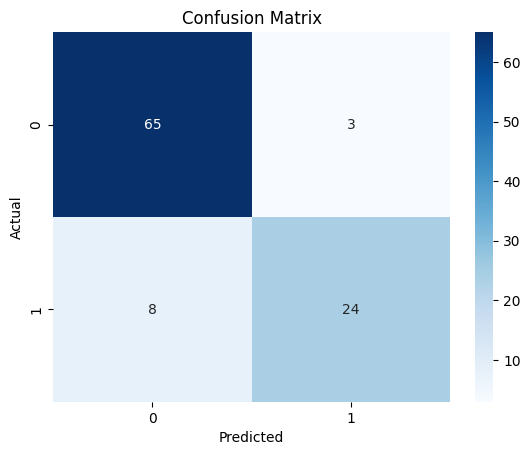

In [25]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()